<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 9. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Stau aus dem Nichts</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir die **Entstehung von Verkehrsstaus** anhand eines relativ simplen Modells verstehen, welches auf dem schon vorher erwähnten Konzept eines **zellulären Automaten** beruht – dem sogenannten Nagel-Schreckenberg-Modell, welches Anfang der 90er Jahre in Köln entwickelt wurde. Die Zellen sind dabei Fahrbahnabschnitte, die entweder von einem Fahrzeug belegt sind oder nicht. Jedes Fahrzeug hat zusätzlich zu seiner Position einen weiteren Parameter, nämlich eine Geschwindigkeit. Der Einfachheit halber umfassen die möglichen Werte für die Geschwindigkeit nur die Zahlen 0,1,2,3,4,5.

Man kann zu diesem Modell durchaus einen Bezug zur Realität herstellen, in dem man folgende Analogie verwendet:
* Länge einer Zelle $\equiv 7.5\,\text{m}$
* Geschwindigkeit $i \equiv i · 27\,$km/h
* Iterationsschritt $\equiv 1\,s$

Der Iterationsschritt dieses zellulären Automaten besteht aus 4 Teilen:

1. **Beschleunigen**: Die Geschwindigkeiten aller Fahrzeuge werden um $1$ erhöht, solange die Höchstgeschwindigkeit $5$ noch nicht erreicht ist.

2. **Bremsen**: Bei allen Fahrzeugen, deren Abstand zum Vordermann kleiner ist als seine Geschwindigkeit, wird die Geschwindigkeit auf diesen Abstand reduziert.

3. **Trödeln**: Jedes Fahrzeug reduziert seine Geschwindigkeit mit Wahrscheinlichkeit $p$ um eine Einheit.

4. **Bewegung**: Jedes Fahrzeug wird um seine Geschwindigkeit interpretiert in Zellen nach vorne bewegt.

Alle Fahrzeuge durchlaufen diesen Zyklus gleichzeitig, d.h. es werden für jedes Fahrzeug die Werte des vorherigen Zyklusses verwendet und nicht die schon teilweise aktualisierten.

Schreiben Sie ein Programm, welchen den oben beschriebenen zellulären Automaten für eine Fahrbahn von 200 Zellen mit periodischen Randbedingungen (wie eine Rennstrecke ohne Auf- und Abfahrt) umsetzt. Ermöglichen Sie dabei, als Parameter die Trödelwahrscheinlichkeit $p$ und die Verkehrsdichte $d$ (in Fahrzeugen pro Zelle) variabel einzustellen. Visualisieren Sie die Fahrzeuge (z.B. als farbig ausgefüllte Zelle) und erstellen Sie eine weitere Grafik  die Durch- schnittsgeschwindigkeit aller Fahrzeuge an.

Wählen Sie zunächst eine gleichmäßig verteilte Startkonfiguration mit ruhenden Fahrzeugen und analysieren Sie die sich entwickelnde Verkehrssituation für folgende Parameter:

1. Überfüllung–$p=0.0$, $d \in [0.2,0.4,0.6,0.8]$,
2. Sonntagsfahrer – $d = 0.2$, $p \in [0.1, 0.2, 0.3]$,
3. Ampelstart – Stellen Sie alle Fahrzeuge zu Beginn direkt hintereinander auf und wählen Sie $p = 0.2$, $d = 0.2$. Wie lange dauert es, bis die entsprechende Durchschnittsgeschwindigkeit aus 2. erreicht ist?

In [1]:
# zufällige Startpositionen
function randomstart(n_cells, n_cars, positions)
    for (i, j) in enumerate(sort(shuffle(collect(1:n_cells))[1:n_cars]))
        positions[i] = j
    end
end

# Funktion, die die 
#     Anzahl der Zellen n_cells
#     Besetungsdichte density
#     Troedelwahrscheinlichkeit dawdling
# als Parameter hat
function traffic_automaton(n_cells, density, dawdling, startcondition)
    time_steps = 4 * n_cells # so viele Zeitschritte wie Zellen - variabel
    traffic = zeros(time_steps, n_cells) # definiere leeres Bild, um Verkehrsbilder zu speichern
    average_speed = [] # Array, um Durchschnittsgeschwindigkeiten zu speichern
    
    n_cars = Int(ceil(n_cells * density)) # Anzahl Autos bestimmen
    positions = zeros(Int64, n_cars) # Aktuelle Positionen
    speeds = ones(n_cars) # Aktuelle Geschwindigkeiten
    
    # startcondition should manipulate positions
    startcondition(n_cells, n_cars, positions)

    
    
    # zentrale Schleife
    for step in 1:time_steps
        
        # hilfsvars
        new_positions = copy(positions)
        new_speeds = copy(speeds)
        
        # Fuer jedes Auto Geschwindigkeit anpassen
        for (car_index, position) in enumerate(positions)
            speed = speeds[car_index]
            ### Beschleunigen
            new_speeds[car_index] = speed < 5 ? speed + 1 : 5
            
            
            ### Bremsen
            max_speed = Int64
            # car jumped already cycled
            if positions[car_index%n_cars+1] < position
                #@show positions[car_index%n_cars+1] + n_cells - position, position, positions[car_index%n_cars+1]
                max_speed = positions[car_index%n_cars+1] + n_cells - position
            # car just in queue
            else
                max_speed = positions[car_index%n_cars+1] - position
            end
            if max_speed < new_speeds[car_index]
                new_speeds[car_index] = max_speed
            end
                        
            # Troedeln
            if rand() < dawdling
                new_speeds[car_index] -= 1
            end
            
            #@show (position+new_speeds[car_index]-1)%n_cells+1
            new_positions[car_index] = (Int64(position + new_speeds[car_index])-1)%n_cells+1
        end
        
        positions = new_positions
        speeds = new_speeds
        
        
        
        # Speichere aktuelles Bild
        line_image = zeros(n_cells)
        for c in 1:n_cars
            line_image[positions[c]] = speeds[c]
        end
        
        traffic[step, :] = line_image
        push!(average_speed, mean(speeds))
    end
    return traffic, average_speed
end

traffic_automaton (generic function with 1 method)

### Beispiellösung
Plotten Sie die Aufgabenkonfigurationen wie in diesem Beispiel gezeigt.

In [3]:
using PyPlot
function plot_traffic(density, dawdling, sorting)
figure(figsize=(20, 15))

#density = 0.35
#dawdling = 0.3

    t, s = traffic_automaton(200, density, dawdling, sorting)
ax1 = subplot(121)
imshow(t, interpolation = "none")
ax1[:axis]("off")
subplot(122)
plot(s)
xlabel(L"Zeitschritt $s$")
ylabel(L"Durchschnittsgeschwindigkeit $<v>$")
end

plot_traffic (generic function with 1 method)

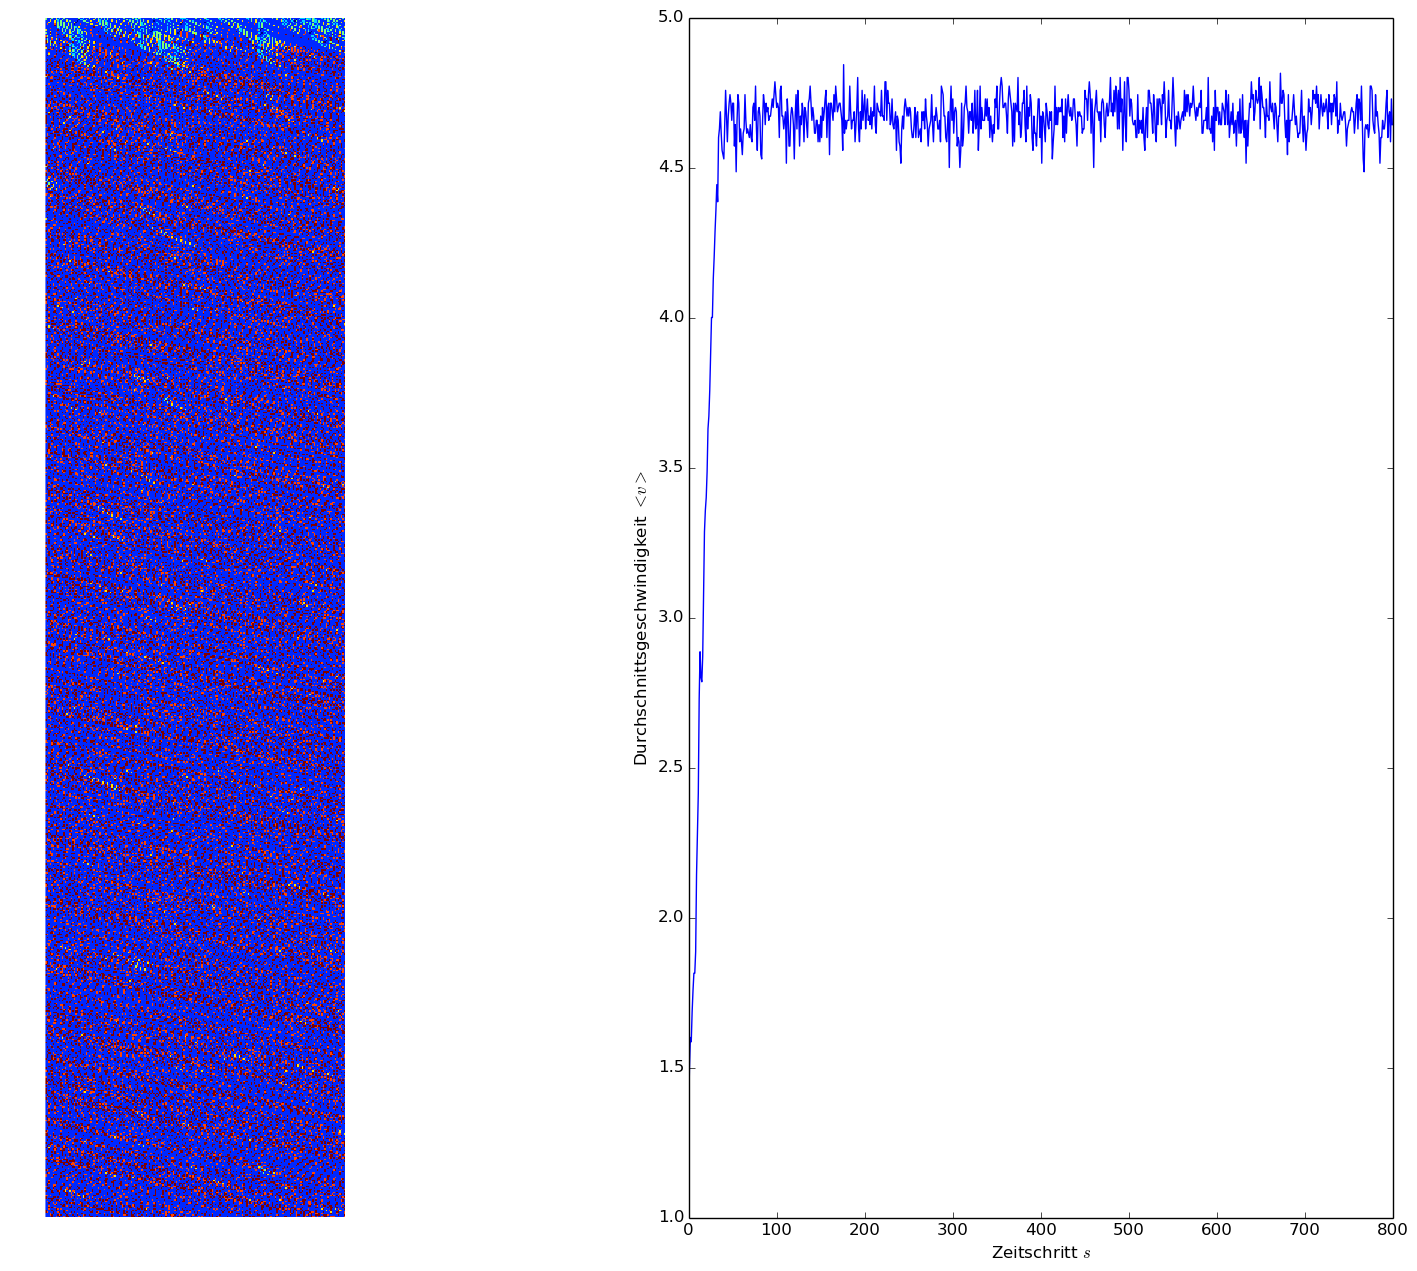

PyObject <matplotlib.text.Text object at 0x7f5426c73ad0>

In [6]:
plot_traffic(.35,.3,randomstart)

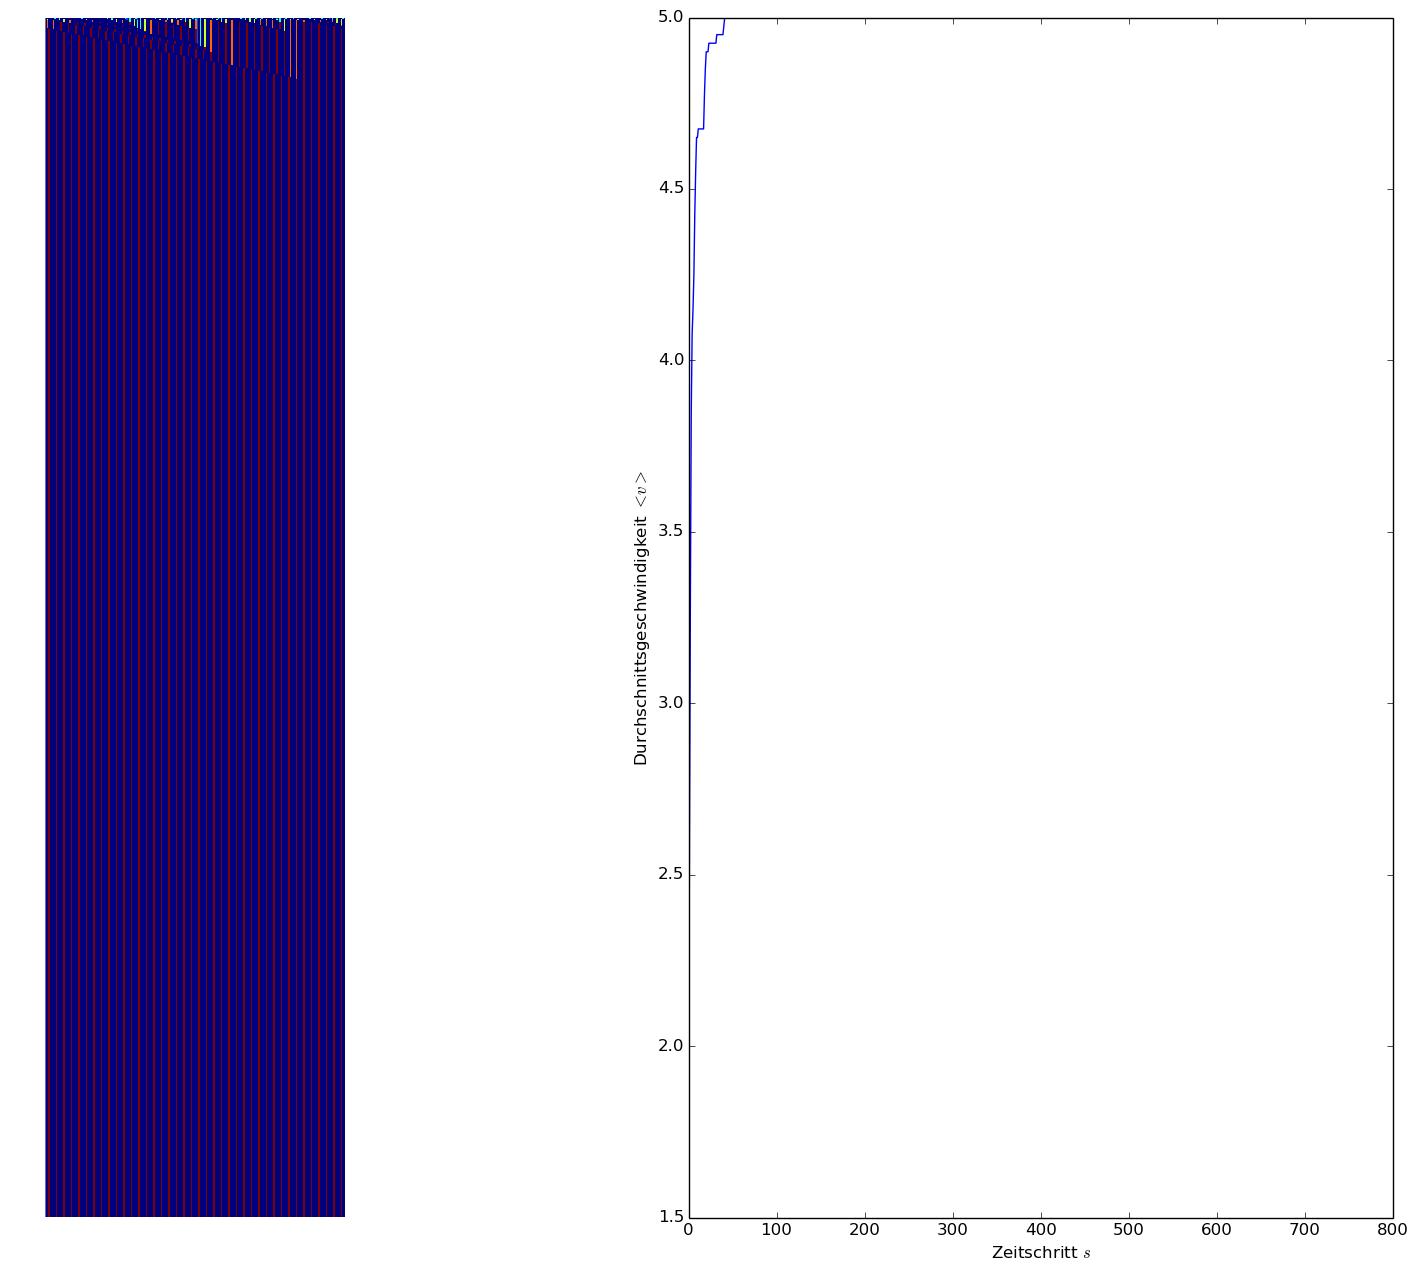

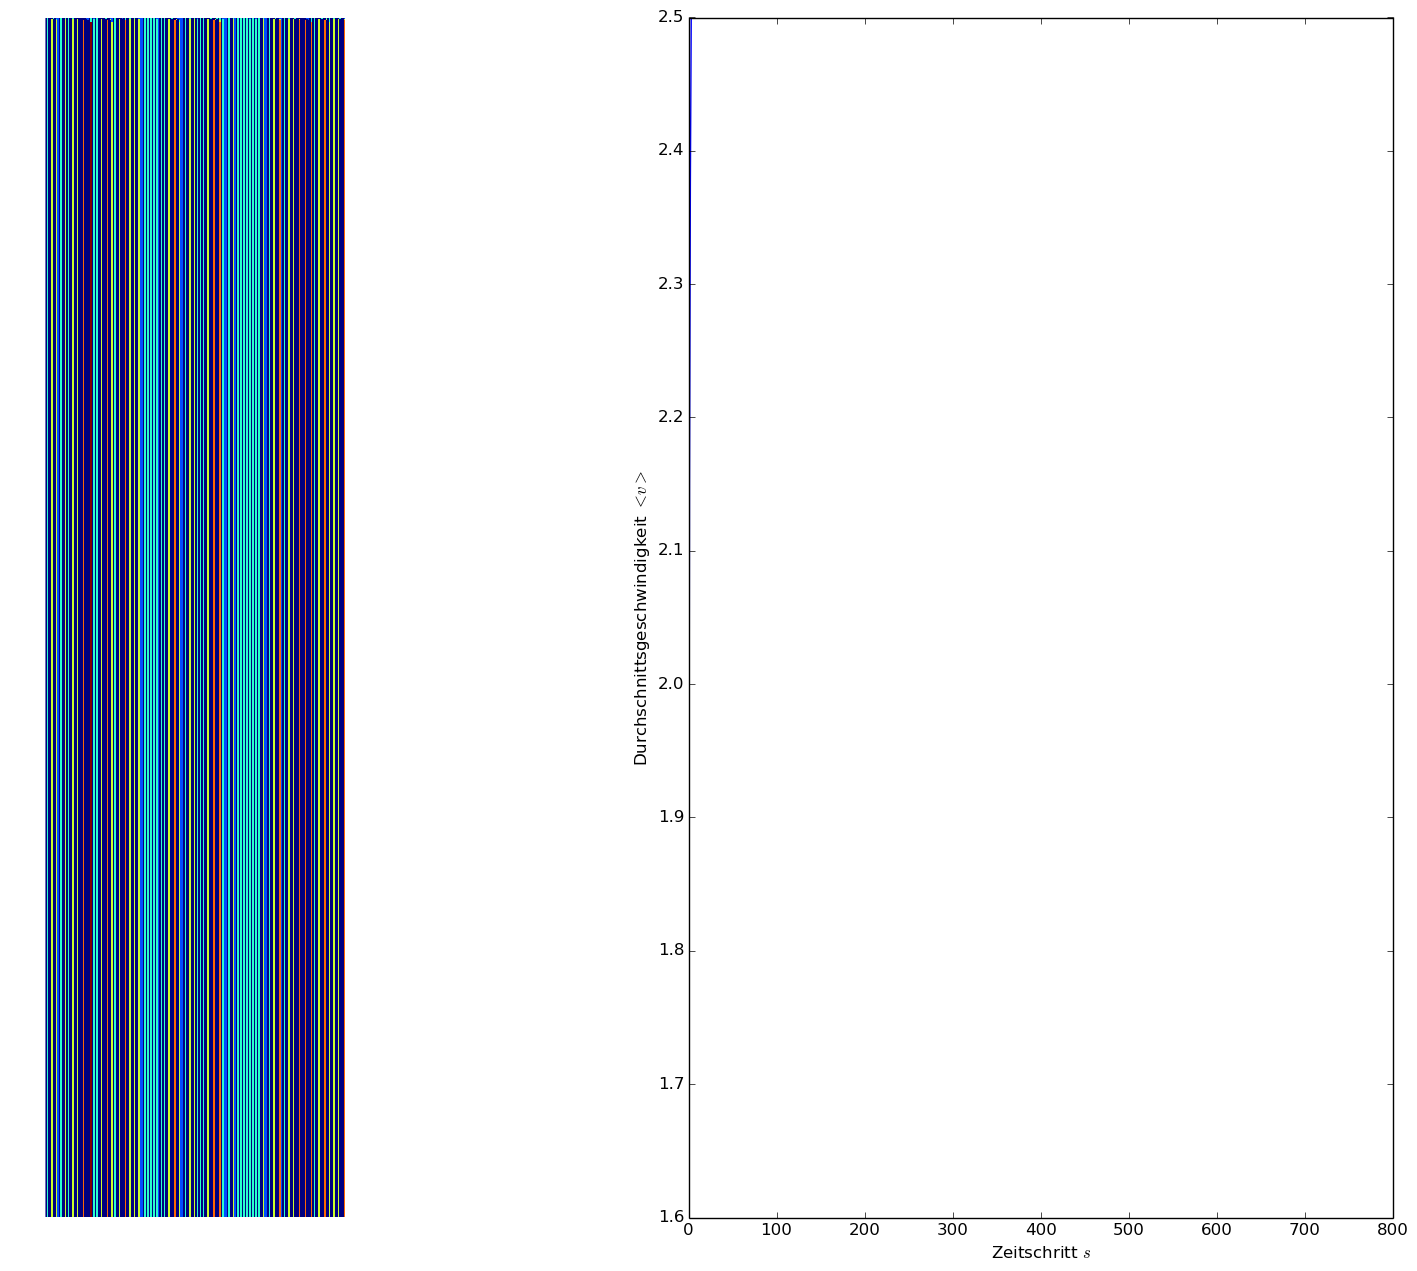

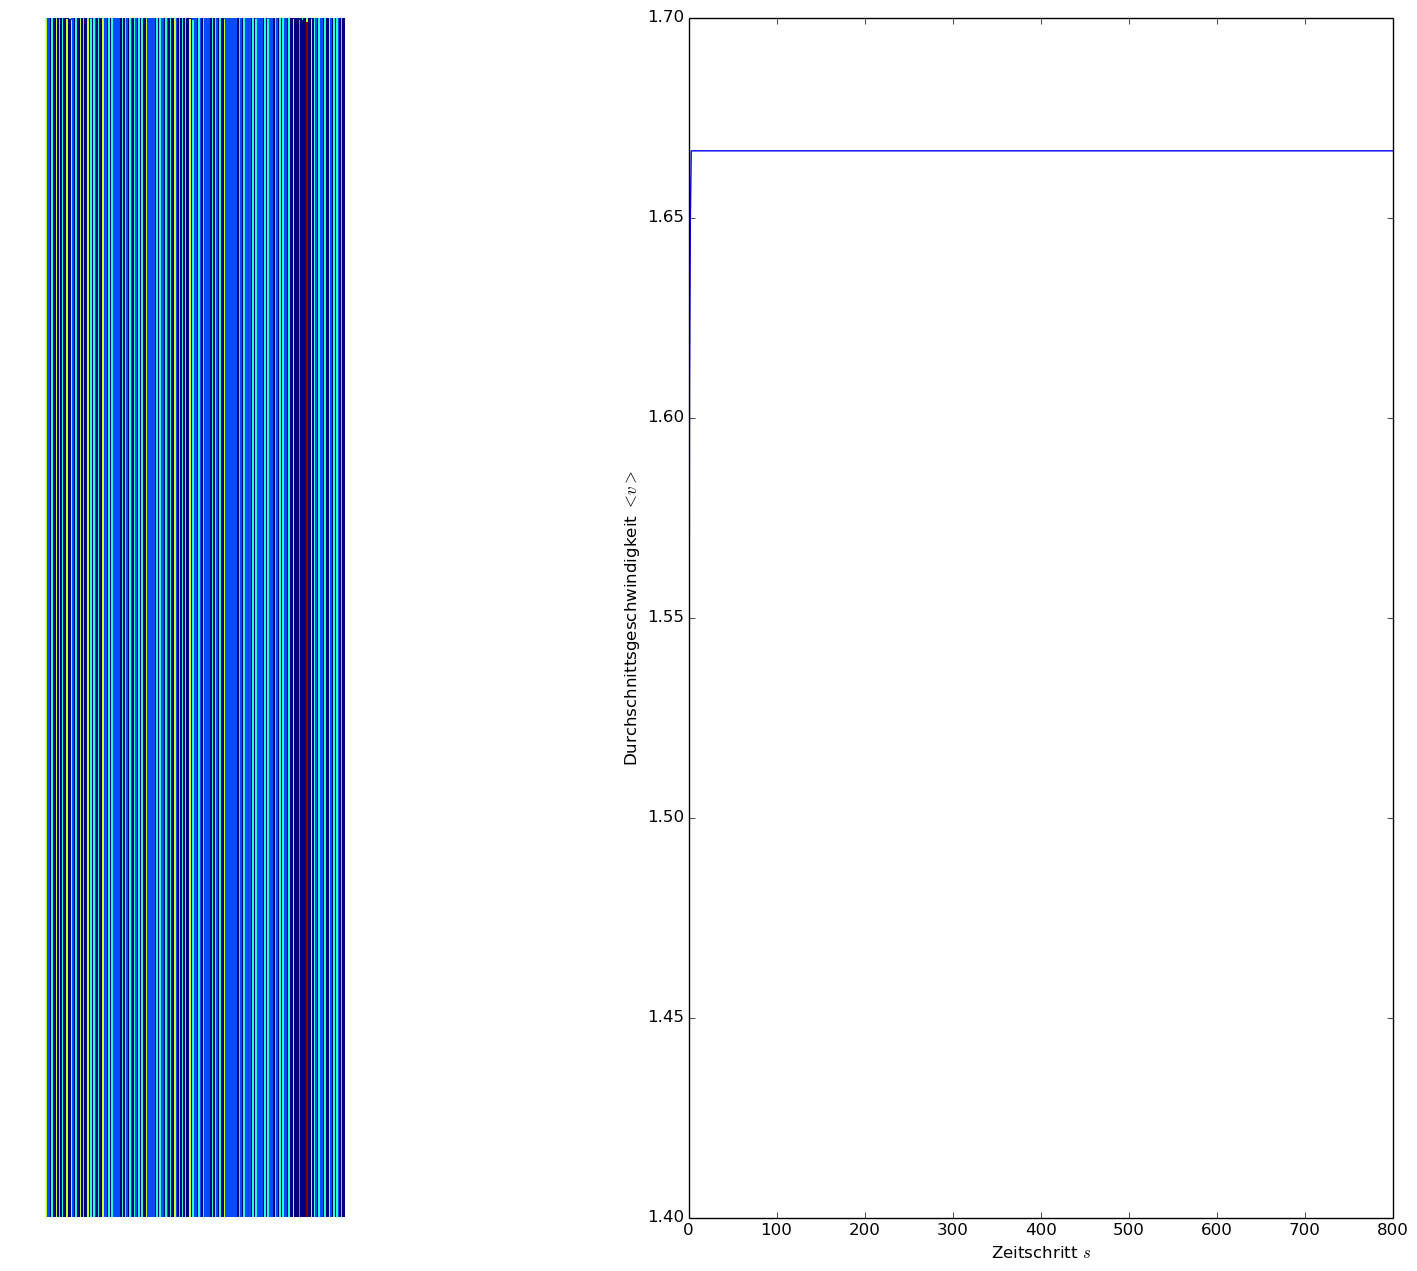

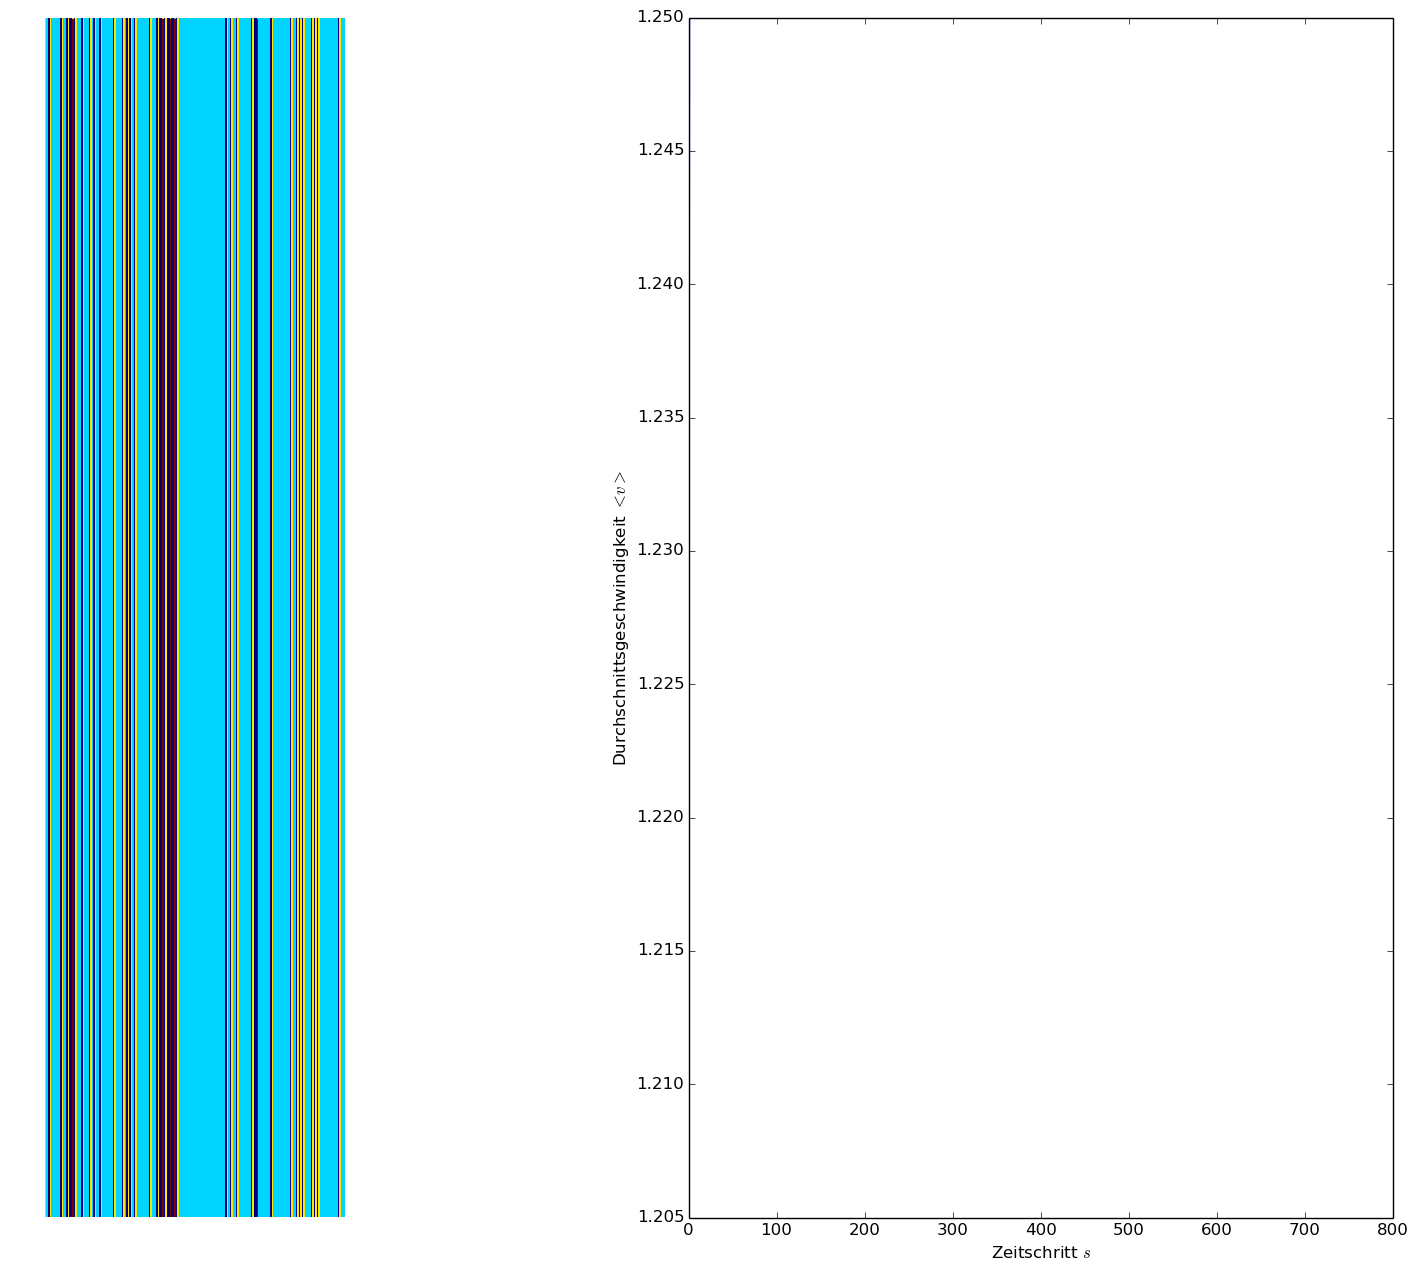

In [4]:
for d in [.2,.4,.6,.8]
    plot_traffic(d,.0,randomstart)
end

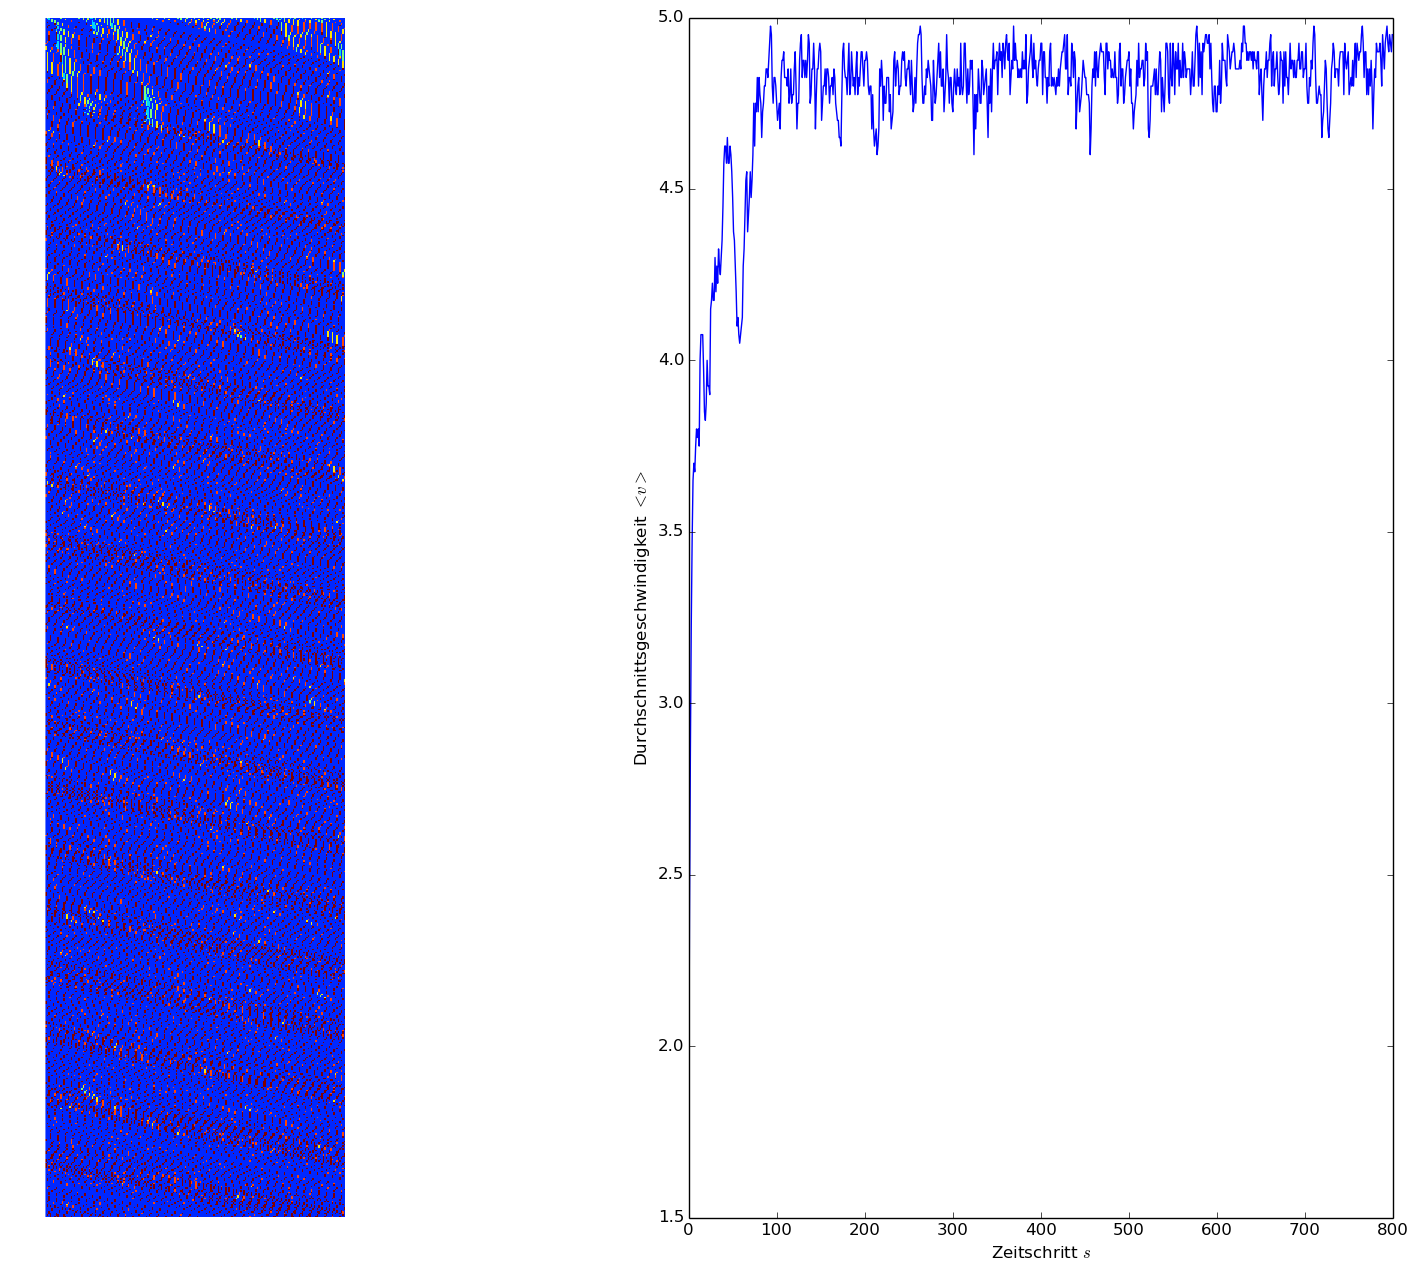

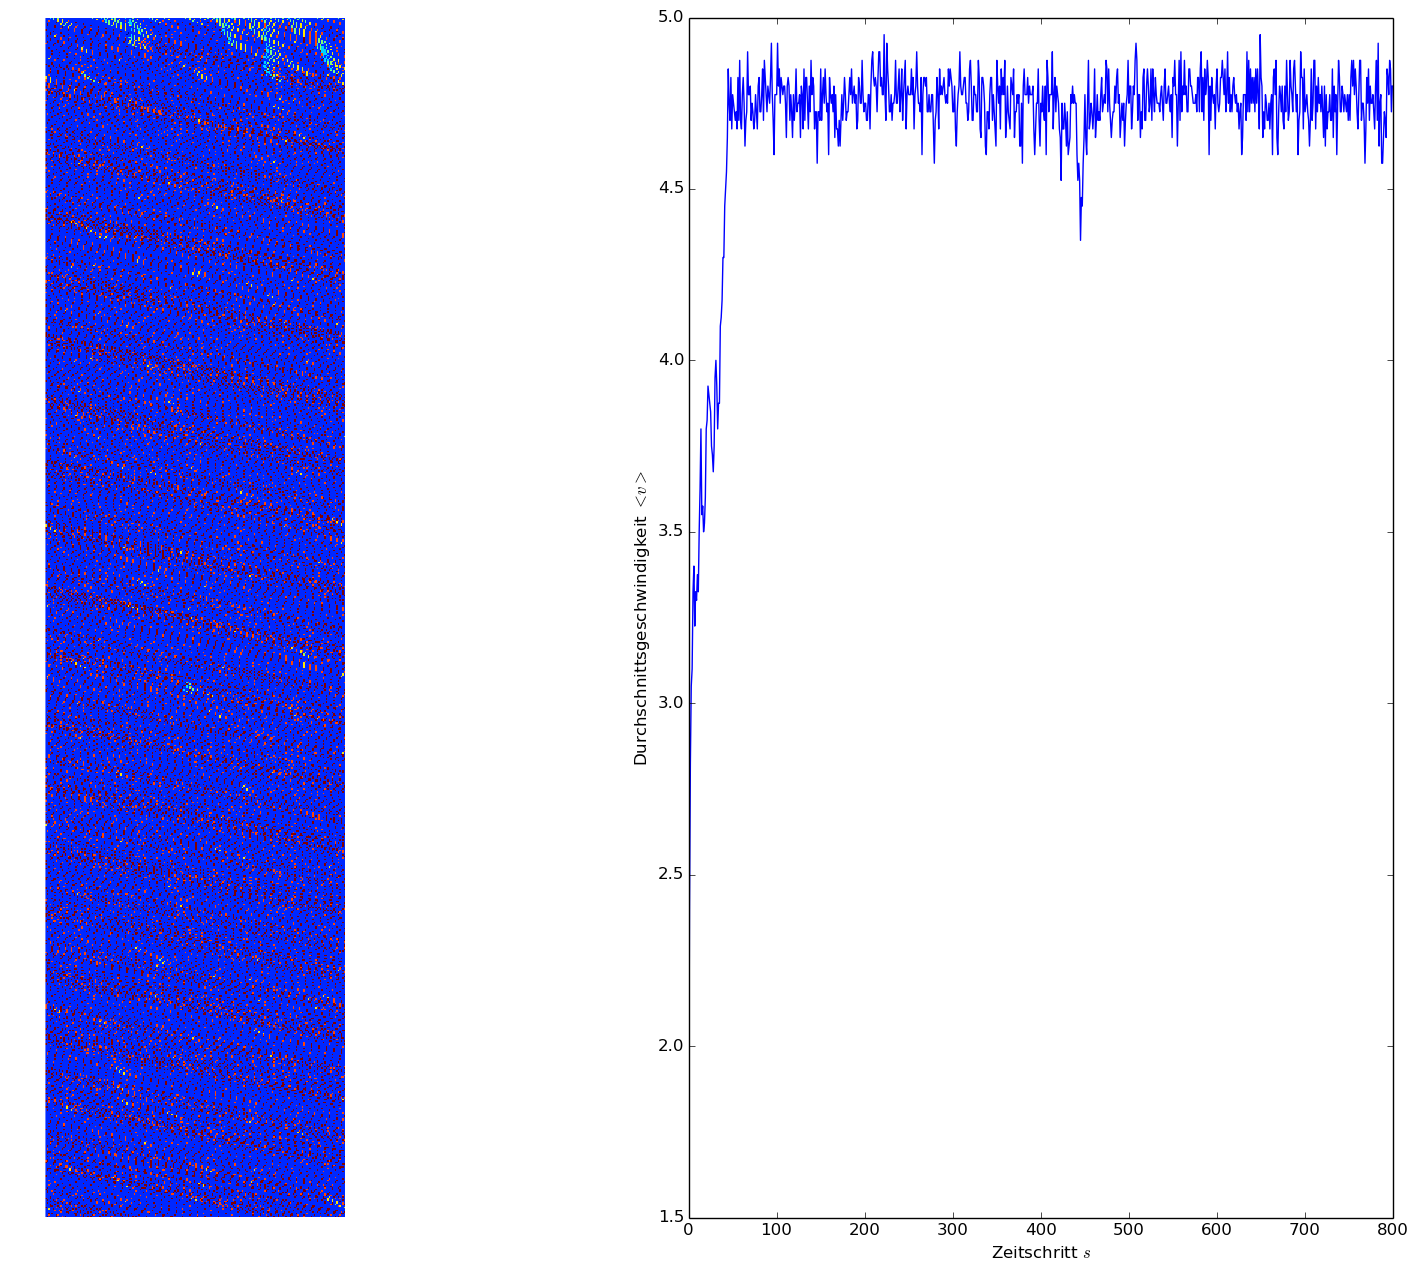

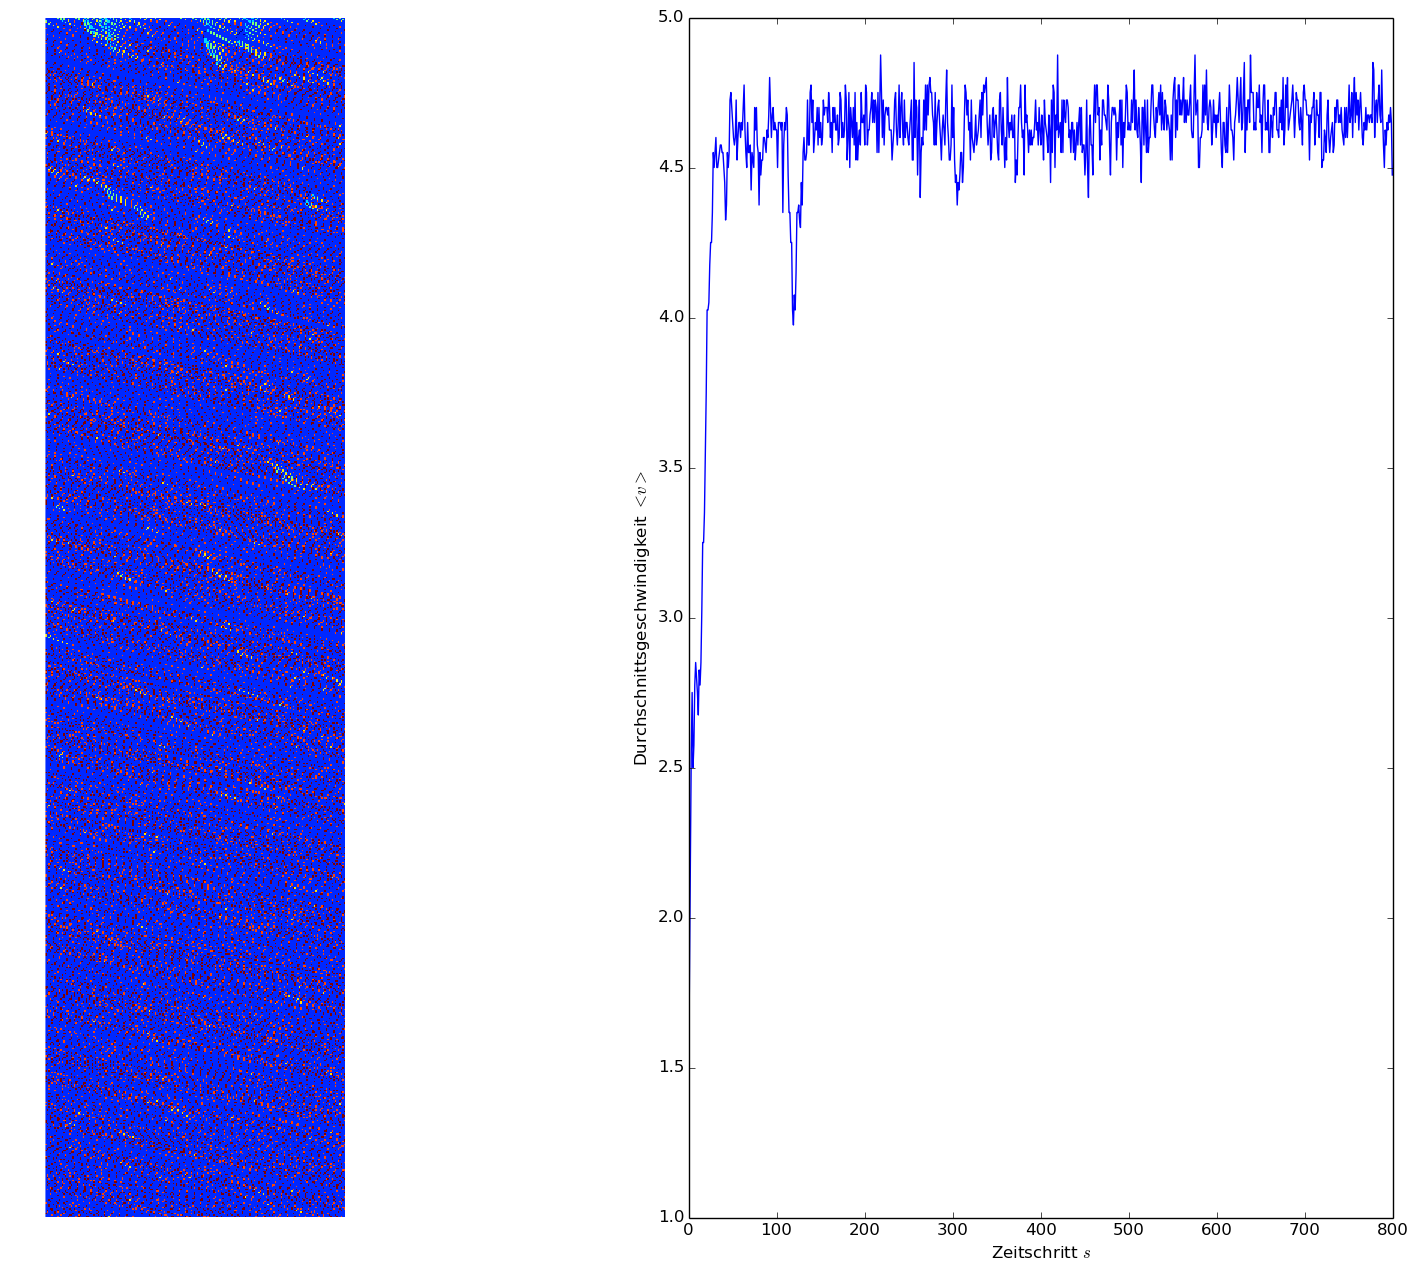

In [6]:
for p in [.1,.2,.3]
    plot_traffic(.2,p,randomstart)
end